# <center> Employee Attrition Prediction: Logistic Regression and Random Forest </center>

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, roc_auc_score, recall_score, accuracy_score, precision_score
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, binarize
import random as rd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


**1. [15 points]** Study the [dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) on employees of a large IT company. Look at the descriptive statistics for all columns (both quantitative, ordinal, and categorical variables). In the variable ```JobSatisfaction```, convert the values to binary form. Values $1$ and $2$ should become zeros, and values from $3$ to $4$ should become ones.

In [6]:
employees = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
employees.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
employees_wide = pd.get_dummies(employees) # создалась куча колонок, неприятно, но label вроде не подходит, так как модель бы ориентировалась на порядок сгенерированных чисел, которые на самом деле ни на что не влияли бы
employees_wide.head(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0


In [8]:
employees_wide.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728,1.0,0.717007,0.282993
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530,0.0,0.450606,0.450606
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [9]:
employees_wide['JobSatisfaction'] = employees_wide['JobSatisfaction'].replace([1, 2], 0).replace([3, 4], 1)

In [10]:
employees_wide.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gen

**2. [20 points]** Select N features (a subset of the most important features, in your opinion, or all available) and build a logistic regression model with k-fold cross-validation ($k=5$) and $L_2$ regularization, where the target variable will be predicting job satisfaction based on the transformed variable ```JobSatisfaction``` ($0$ - dissatisfaction, $1$ - satisfaction). Write which type of machine learning task this is (regression, clustering, or something else). Interpret the coefficients of the trained model.

In [52]:
# это классификация, так как мы определяем не величину, а значение категориальной переменной
# интерпретация коэффициентов - сказать, какие хорошие и какие плохие
X = employees_wide[['DistanceFromHome', 'EnvironmentSatisfaction', 'Gender_Female', 'Gender_Male', 
                    'JobInvolvement', 'WorkLifeBalance']]
y = employees_wide['JobSatisfaction']

In [53]:
logregr = LogisticRegressionCV(penalty='l2')

In [54]:
logregr_fitted = logregr.fit(X, y)
logregr_fitted.coef_

array([[ 0.00077315, -0.00175472, -0.00092572,  0.00092597, -0.0008541 ,
        -0.00047244]])

In [55]:
scores = cross_val_score(logregr_fitted, X, y, cv=5)
scores

array([0.61564626, 0.6122449 , 0.6122449 , 0.6122449 , 0.6122449 ])

Type of machine learning task: classification, because we are determining not a numerical value but the value of a categorical variable.

The coefficients of logregr_fitted show the relationship between a specific variable and the 'JobSatisfaction' variable.  

For example, the coefficient 0.00077315 shows a direct relationship between the distance to home and job satisfaction.


**3. [20 points]** Build a decision tree using all features, using the entropy criterion, and visualize it using the graphviz library (or sklearn.export_graphiz and image import). Interpret the predicates in the tree (logical expressions of features and their values) through which you obtained predictions for the positive class (for all leaves with prediction $1$).



In [56]:
X_tree, y_tree = employees_wide.drop('JobSatisfaction', axis='columns'), employees_wide['JobSatisfaction']
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y_tree, test_size=0.2, random_state=777)

In [57]:
dtc = DecisionTreeClassifier(criterion='entropy',  min_samples_split = 50, max_depth=4)
dtc_fitted = dtc.fit(X_tree_train, y_tree_train) # посадили дерево

In [58]:
dtc_fitted.score(X_tree_train, y_tree_train)

0.6454081632653061

In [59]:
dtc_fitted.score(X_tree_test, y_tree_test) # данное значение, близкому к полученному на тренировочных данных, подтверждает, что дерево не переобучилось

0.6156462585034014

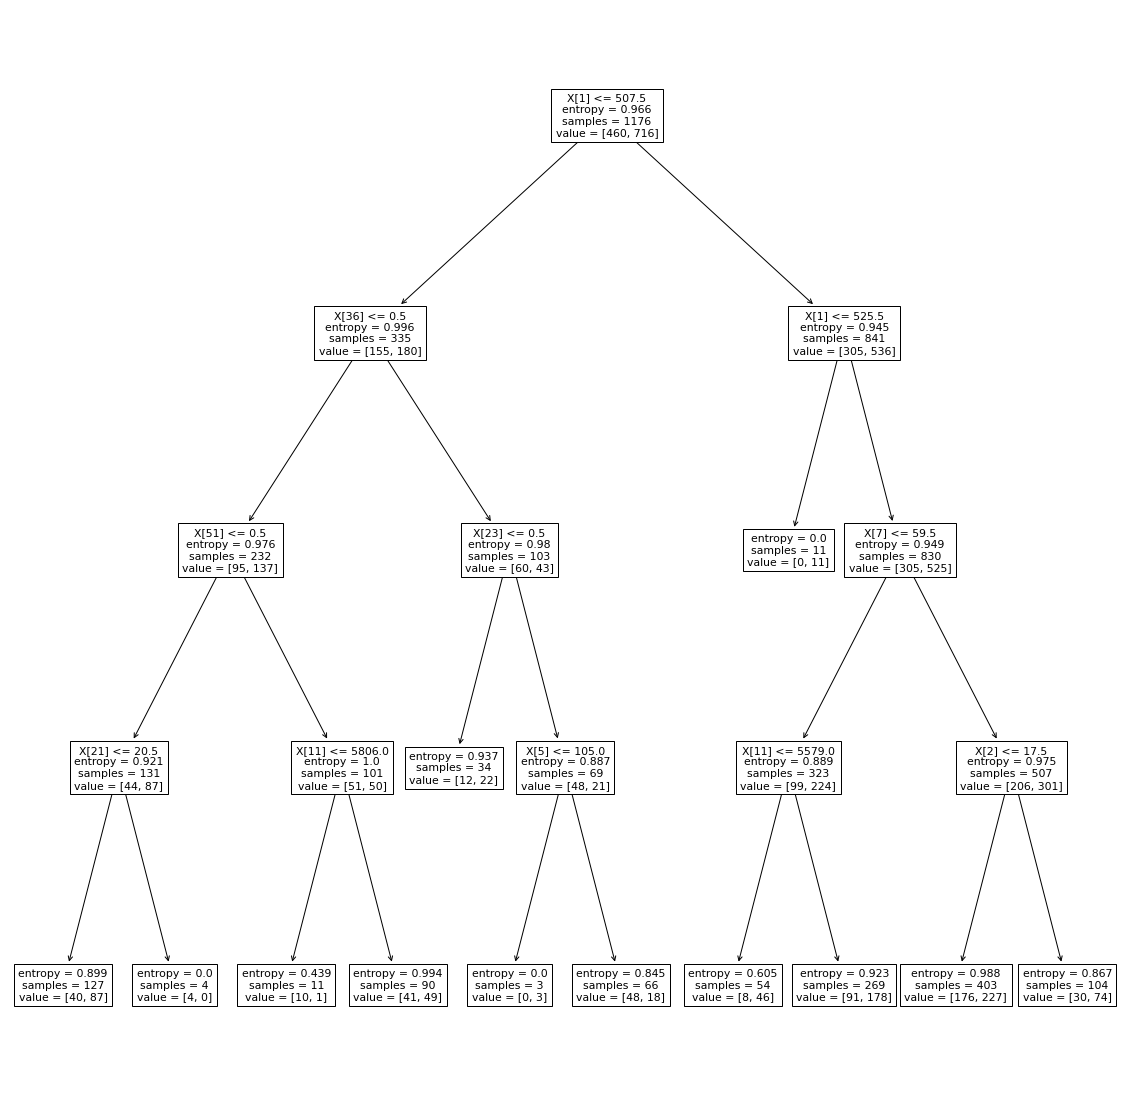

In [19]:
plt.figure(figsize=(20, 20))
tree.plot_tree(dtc_fitted);

1. Found values less than 507.5 in the column X_tree_train.columns[1], that is, in the column 'DailyRate'.  
Then found values less than 0.5 in the column 'EducationField_Medical', then less than 0.5 in the column 'MaritalStatus_Married',  
and finally, less than 20.5 in the column 'YearsAtCompany'.  
2. Found values less than 507.5 in the column 'DailyRate', then in this same column found values less than 525.5  
3. Similarly, positive classes are defined in the middle of the fourth "floor" of the tree.









**4. [20 points]** Train a random forest and tune the parameters ```n_estimators```, ```max_depth```, ```min_samples_leaf```, ```max_features```, using ```GridSearchCV``` or ```RandomizedSearchCV```.



In [21]:
dtc_forest = RandomForestClassifier(random_state=42, n_jobs=-1) # n_estimators= , max_features= , max_depth= , min_samples_split
dtc_forest = dtc_forest.fit(X_tree_train, y_tree_train)

In [22]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
parameters = {'n_estimators': [5, 10, 15, 20, 30, 50, 75, 100, 300, 500, 1000], 'max_features': [1, 3, 5, 10, 15, 20, 25, 30, 40, 50, 57], 'min_samples_leaf': range(1, 10), 'max_depth': range(1, 10)}
rcv = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=skf, scoring='accuracy')
rcv.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(1, 10),
                                        'max_features': [1, 3, 5, 10, 15, 20,
                                                         25, 30, 40, 50, 57],
                                        'min_samples_leaf': range(1, 10),
                                        'n_estimators': [5, 10, 15, 20, 30, 50,
                                                         75, 100, 300, 500,
                                                         1000]},
                   scoring='accuracy')

In [24]:
rcv.best_score_

0.6129251700680273

In [25]:
rcv.best_params_

{'n_estimators': 300, 'min_samples_leaf': 8, 'max_features': 1, 'max_depth': 2}

In [71]:
# we can also deduce the importance of various attributes
# predictors = []
# for column in employees_wide.columns:
#     predictors.append(column)
# for feat, imp in zip(predictors, dtc_forest.feature_importances_):
#     print(f'Важность признака "{feat}": {imp}')

**5. [25 points]** Create predictions for your sample, simulating constant (always predicting class label 1) and random (for each observation, equally likely to predict class labels $1$ or $0$) classifiers. Plot the ROC curves for logistic regression, decision tree, random forest, constant, and random classifiers on one graph and draw conclusions about the quality of the resulting models. For the best model (according to the AUC metric), calculate the confusion matrix, Accuracy, Precision, and Recall.



In [27]:
dtc_fitted_our_viborka = dtc.fit(X, y)
dtc_forest_our_viborka = dtc_forest.fit(X, y)

In [28]:
y_pred_logregr = logregr_fitted.predict_proba(X)[:, 1]
y_pred_tree = dtc_fitted_our_viborka.predict_proba(X)[:, 1]
y_pred_forest = dtc_forest_our_viborka.predict_proba(X)[:, 1]
y_pred_const = np.ones(X.shape[0])
listik_1 = [0, 1]
listik_2 = []
for i in range(X.shape[0]):
    a = rd.choice(listik_1)
    listik_2.append(a)
y_pred_random = np.array(listik_2)

In [29]:
logregr_auc = roc_auc_score(y, y_pred_logregr)
tree_auc = roc_auc_score(y, y_pred_tree)
forest_auc = roc_auc_score(y, y_pred_forest)
const_auc = roc_auc_score(y, y_pred_const)
random_auc = roc_auc_score(y, y_pred_random)

In [30]:
logregr_fpr, logregr_tpr, _ = roc_curve(y, y_pred_logregr)
tree_fpr, tree_tpr, _ = roc_curve(y, y_pred_tree)
forest_fpr, forest_tpr, _ = roc_curve(y, y_pred_forest)
const_fpr, const_tpr, _ = roc_curve(y, y_pred_const)
random_fpr, random_tpr, _ = roc_curve(y, y_pred_random)

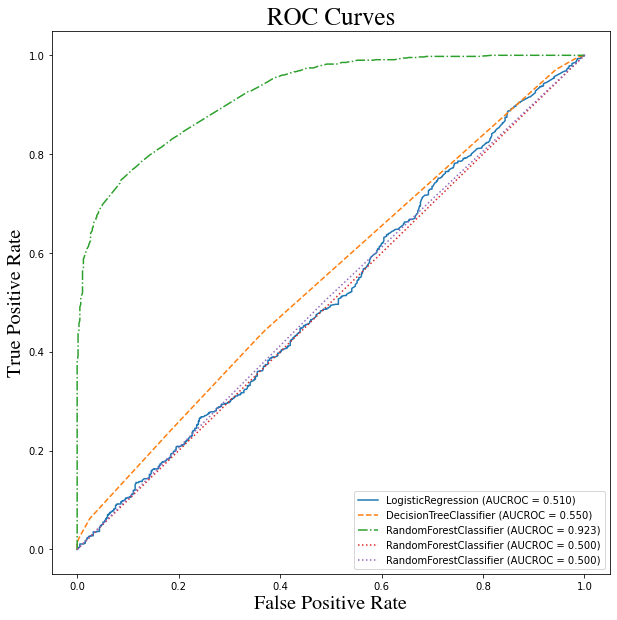

In [44]:
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.plot(logregr_fpr, logregr_tpr, linestyle = 'solid', label = 'LogisticRegression (AUCROC = %0.3f)' % (logregr_auc))
plt.plot(tree_fpr, tree_tpr, linestyle = 'dashed', label = 'DecisionTreeClassifier (AUCROC = %0.3f)' % (tree_auc))
plt.plot(forest_fpr, forest_tpr, linestyle = 'dashdot', label = 'RandomForestClassifier (AUCROC = %0.3f)' % (forest_auc))
plt.plot(const_fpr, const_tpr, linestyle = 'dotted', label = 'RandomForestClassifier (AUCROC = %0.3f)' % (const_auc))
plt.plot(random_fpr, random_tpr, linestyle = 'dotted', label = 'RandomForestClassifier (AUCROC = %0.3f)' % (const_auc))

plt.title('ROC Curves', fontsize = 25, fontname = 'Times')
plt.xlabel('False Positive Rate', fontsize = 20, fontname = 'Times')
plt.ylabel('True Positive Rate', fontsize = 20, fontname = 'Times')
plt.legend()
plt.show()

Thus, the best model is the forest, because the area under the 'dashdot' curve is the largest. The other models are not very suitable because their curves are close to the bisector of the quarter, meaning the area under the curve is about 0.5.




In [32]:
y_pred_forest_class = dtc_forest_our_viborka.predict(X)
confusion_matrix(y, y_pred_forest_class)

array([[415, 154],
       [104, 797]])

In [33]:
accuracy_score(y, y_pred_forest_class)

0.8244897959183674

In [34]:
precision_score(y, y_pred_forest_class)

0.8380651945320715

In [291]:
recall_score(y, y_pred_forest_class)

0.8790233074361821